In [2]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
database_name = 'telecom'
table_name = 'xdr_data'

In [4]:
connection_params = {'host': 'localhost', 'user': 'postgres',
                         'password': 'Postgresql', 'port': "5432",
                         'database': database_name }

engine = create_engine(f"postgresql+psycopg2://{connection_params['user']}:{connection_params['password']}@{connection_params['host']}:{connection_params['port']}/{connection_params['database']}")


In [5]:

# str or SQLAlchemy Select table (select or text object)
sql_query = 'SELECT * FROM xdr_data'

df = pd.read_sql(sql_query, con= engine)

In [6]:
df.shape

(150001, 55)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

#### Task 2 - User overview analysis
For the actual telecom dataset, you‘re expected to conduct a full User Overview analysis & the following sub-tasks are your guidance: 
- Start by identifying the top 10 handsets used by the customers.
- Then, identify the top 3 handset manufacturers
- Next, identify the top 5 handsets per top 3 handset manufacturer
- Make a short interpretation and recommendation to marketing teams


In [8]:
################################### PLOTTING FUNCTIONS ###################################

def top_10_handsets(data):
    data['Handset Type'].value_counts()[:10].plot.bar(figsize=(10, 5))
    plt.title(f'Top 10 Handsets used by the customers', size=15, fontweight='bold')
    plt.xlabel("Handsets Type", size=18); plt.ylabel("Usage Frequency", size=14);
    plt.xticks(size=12); plt.yticks(size=12);
    plt.show()

def top_3_manufacturers(data):
    data['Handset Manufacturer'].value_counts()[:3].plot.bar()
    plt.title(f'Top 3 Handset Manufacturers', fontweight= 'bold')
    plt.xlabel("Handset Manufacturers"); 
    plt.ylabel("Frequency");
    plt.show()



def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


#### Top 3 Handset Manufacturers

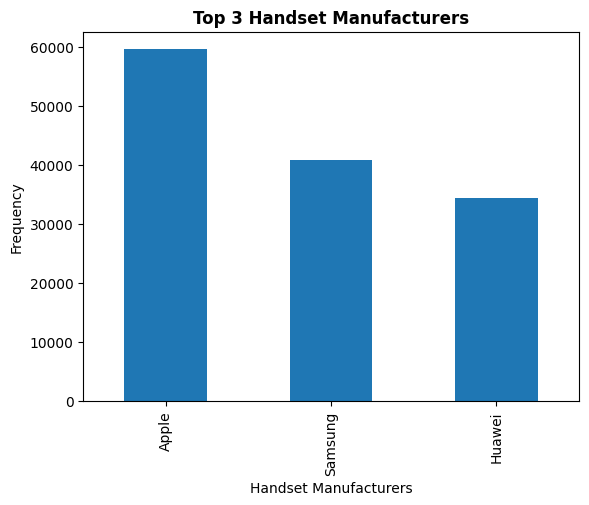

In [9]:
top_3_manufacturers(df)

#### Top 10 Handsets used by customers

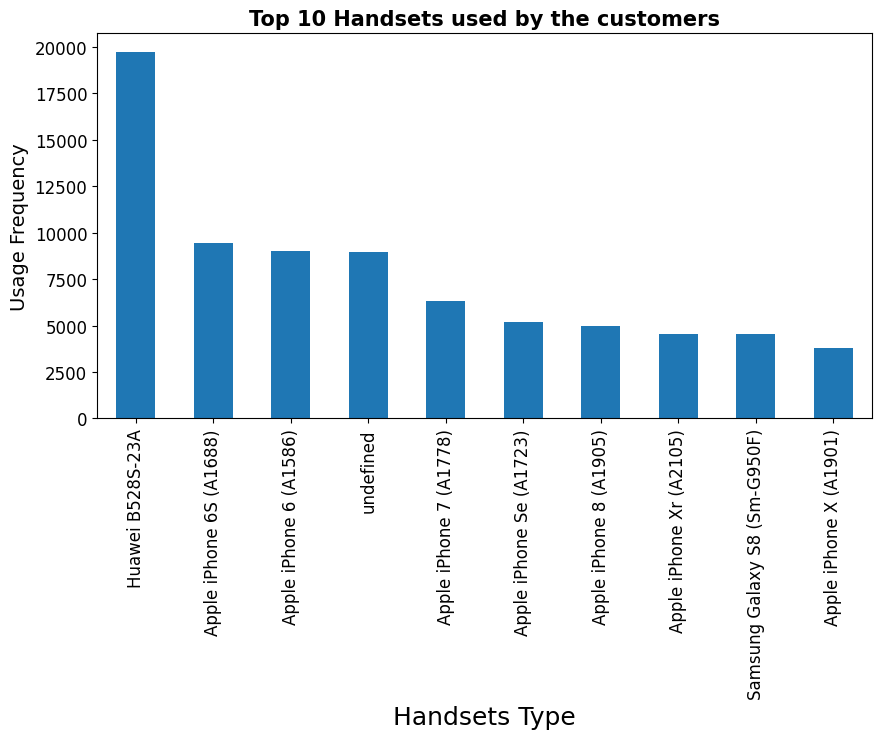

In [10]:
top_10_handsets(df)

#### The top 5 handsets per top 3 handset manufacturer

In [11]:
A = df.groupby(['Handset Manufacturer', 'Handset Type'])['Handset Type'].count().reset_index(name='Count')
C = A["Handset Type"].value_counts().rank(ascending = False)
D = df.groupby(['Handset Manufacturer'])['Handset Type'].value_counts().rank(ascending=False).reset_index(name='Count')
D

,Handset Manufacturer,Handset Type,Count
0,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot X18 Plus,745.5
1,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot A5,1113.5
2,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot Note S,1113.5
3,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot Nova,1113.5
4,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot Power,1113.5
...,...,...,...
1391,Zte,Zte Blade V8 Blade V8,1113.5
1392,ZyXEL Communications Corp,Zyxel Communicat. Zyxel Wah7706,1113.5
1393,Zyxel Communications Corp,Zyxel Communicat. Sbg3600,1113.5
1394,Zyxel Communications Corp,Zyxel Communicat. Lte7460,1113.5


Task 2.1 - Your employer wants to have an overview of the users’ behaviour on those applications.   
- Aggregate per user the following information in the column  
  - number of xDR sessions
  - Session duration
  - the total download (DL) and upload (UL) data
  - the total data volume (in Bytes) during this session for each application


In [12]:
df.groupby(df['MSISDN/Number'])[['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']].sum()

,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
MSISDN/Number,,,,,,,,,,,,,,,,,
3.360100e+10,116720.0,8.426375e+08,36053108.0,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,377096990.0,9473882.0
3.360100e+10,181230.0,1.207552e+08,36104459.0,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0
3.360100e+10,134969.0,5.566597e+08,39306820.0,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0
3.360101e+10,49878.0,4.019932e+08,20327526.0,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0
3.360101e+10,37104.0,1.363130e+09,94280527.0,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.379000e+10,8810.0,6.879252e+08,26716429.0,234320.0,65863.0,6834178.0,697091.0,480946.0,525969.0,8294310.0,18353533.0,14754741.0,147797.0,6.573267e+08,3034642.0,291391283.0,3891534.0
3.379000e+10,140988.0,4.445751e+08,35732243.0,442214.0,56355.0,1472406.0,3957299.0,2513433.0,664.0,5596862.0,14254710.0,6929961.0,1601099.0,4.276202e+08,9383076.0,204636073.0,6479040.0
3.197021e+12,877385.0,1.948281e+08,37295915.0,668596.0,46628.0,8572779.0,1865881.0,842279.0,678492.0,9839889.0,2120016.0,10340908.0,16251392.0,1.645636e+08,13485133.0,467678100.0,2848373.0


### Task 2-2
#### Statistical Description of the data 

In [13]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


Let's create a duration in seconds

In [14]:
# create a copy of my data
dff = df.copy() 

# create new features by converting Bytes to MegaBytes
dff['Dur. (s)'] = df['Dur. (ms)'] / 1000
dff['Dur. (s)'].describe()

count    150000.000000
mean        104.608560
std          81.037621
min           7.142000
25%          57.440500
50%          86.399000
75%         132.430250
max        1859.336000
Name: Dur. (s), dtype: float64

On average Customer used the network (uploading or downloading) for `105 sec` with a dispersion of `81 sec`. the highest duration a customer spent on the network is `1859 sec`. And the mininum time a customer spent on the network is `7 sec`

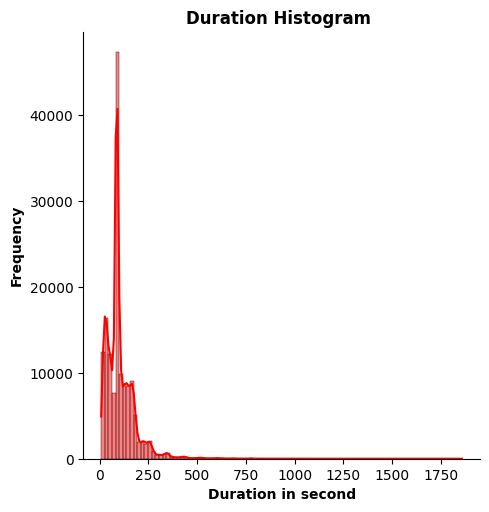

In [15]:
# Duration

sns.displot(dff['Dur. (s)'], kde = True, color = 'red', bins =100)
plt.title("Duration Histogram ", fontweight='bold')
plt.xlabel('Duration in second', fontweight= 'bold')
plt.ylabel('Frequency', fontweight='bold')

plt.show()

In [16]:
#plot_box(dff, dff['Dur. (s)'], "Duration Boxplot")

####

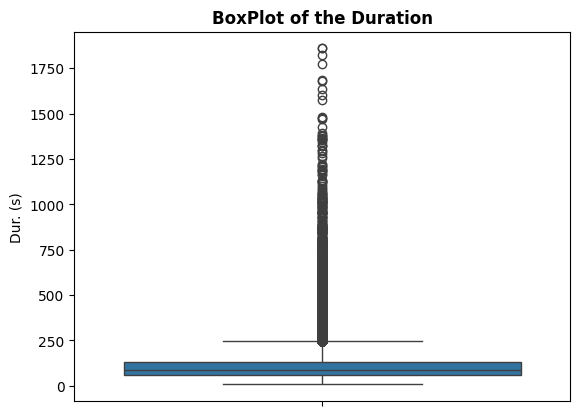

In [17]:
sns.boxplot(dff['Dur. (s)'])
plt.title("BoxPlot of the Duration", fontweight='bold')
plt.show()

#### Univariate Analysis on Data Volume

In [18]:
dff[['Total UL (MB)', 'Total DL (MB)']] = dff[['Total UL (Bytes)', 'Total DL (Bytes)']] / 1024 / 1024

dff[['Total UL (MB)', 'Total DL (MB)']].describe()

,Total UL (MB),Total DL (MB)
count,150000.000000,150000.000000
mean,39.216238,433.581762
std,10.754000,232.832789
min,2.734081,6.784478
25%,31.682978,231.844714
50%,39.237320,434.723928
75%,46.762694,634.866280
max,74.702559,861.138931


In [19]:
#plot_hist(dff, dff["Total DL (MB)"], 'blue')
#plot_hist(dff, dff["Total UL (MB)"], 'green')

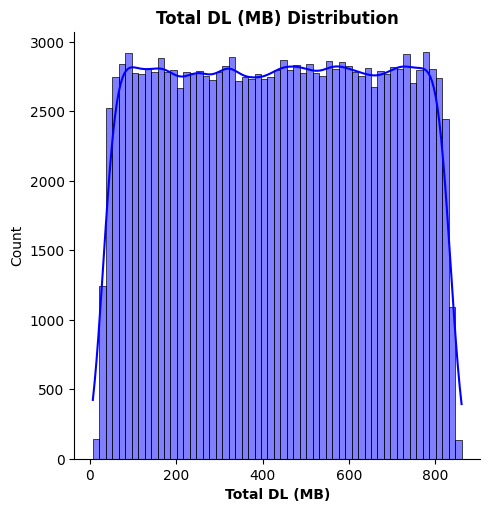

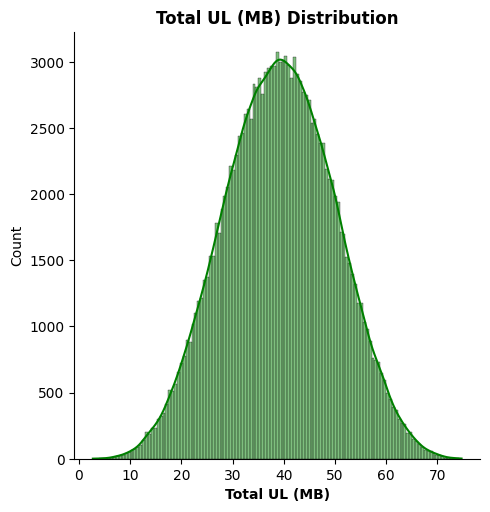

In [20]:
sns.displot(dff['Total DL (MB)'], kde = True, color = 'blue')
plt.title("Total DL (MB) Distribution", fontweight= 'bold')
plt.xlabel("Total DL (MB)", fontweight= 'bold')
plt.show()

sns.displot(dff['Total UL (MB)'], kde = True, color = 'green')
plt.title("Total UL (MB) Distribution", fontweight= 'bold')
plt.xlabel("Total UL (MB)", fontweight= 'bold')
plt.show()


#### Bivariate Analysis

<Axes: >

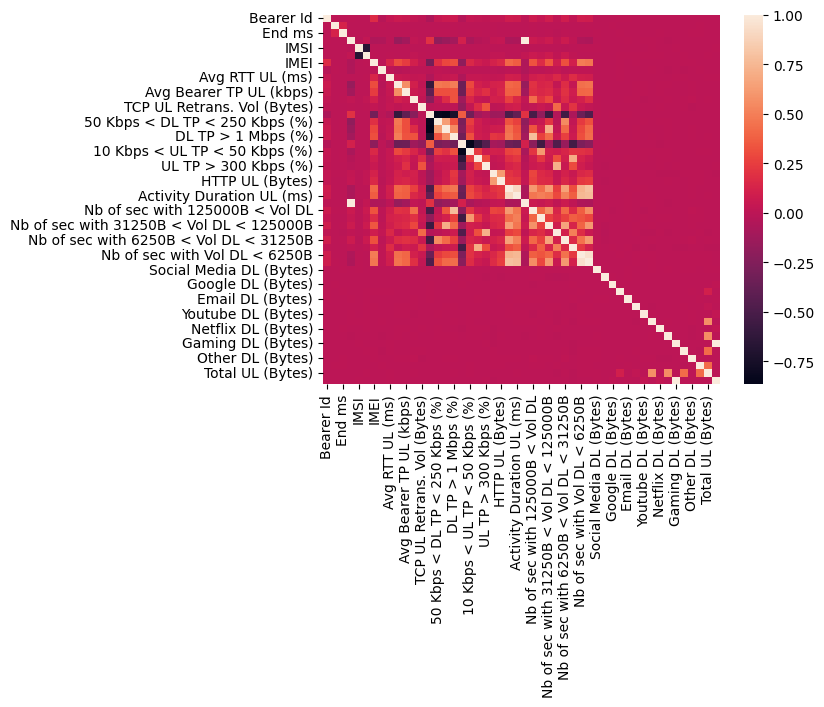

In [21]:
# create df_num for numeric features
df_num = df.select_dtypes(exclude='object')
mat = df_num.corr()
sns.heatmap(mat)

This correlation matrix shows the correlation between numerical features in our data.
Hence, we can notice a strong positive correlation between Duration and Total UL and Total DL



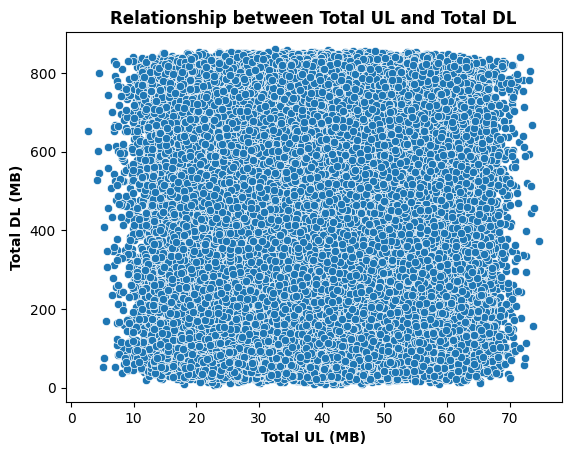

In [22]:
sns.scatterplot(data = df, x= dff["Total UL (MB)"], y= dff["Total DL (MB)"])
plt.title("Relationship between Total UL and Total DL", fontweight ='bold')
plt.xlabel("Total UL (MB)", fontweight ='bold')
plt.ylabel("Total DL (MB)", fontweight ='bold')
plt.show()

In [23]:
#sns.catplot(data = df, x=df["Handset Type"], y =df["Total DL (MB)"])
#plt.show()

#### Handling missing values on the numerical data before Dimension Reduction.

In [24]:
df_num.isnull().sum()

Bearer Id                                      991
Start ms                                         1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)                             754
UL TP < 10 Kbps (%)                            792
10 Kbps < UL TP < 50 Kbps (%)                  792
50 Kbps < UL TP < 300 Kbps (%) 

In [25]:
# How many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing (df):
    # calculate total number of cells in dataframe
    totalCells = np.prod(df.shape)

    # count the number of missing values per column
    missingCount = df.isnull().sum()

    # Calcualte total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    missingPercentage = round(((totalMissing/totalCells)*100), 2)
    #print(f"The Telecom database contains {missingPercentage}% missing values")
    return missingPercentage

#print(f"The Telecom database contains {percent_missing (dff)}% of missing values")
print(f"The numerical data contains {percent_missing (df_num)}% of missing values")

The numerical data contains 13.72% of missing values


#### Let's work on the missing values by evaluating the percentage of each feature. After that, order them. Finally, remove the ones above average 😉

In [26]:
def missing_value_with_percentage(df):
    # converting the columns of our data into a list.
    missing = []
    col = df.columns.tolist()
    # add corresponding feature and missing value percentage into missing[]
    for i in col:
        missing.append((i, percent_missing(df[i])))

    missing_percent = pd.DataFrame(missing, columns = ['Features', 'MissingPercentage'])
    missing_sorted = missing_percent.sort_values(by='MissingPercentage', ascending=False)
    return missing_sorted

In [27]:
# Display top 15 missing values
missing_sorted = missing_value_with_percentage(df_num)
missing_sorted.head(15)

,Features,MissingPercentage
29,Nb of sec with 37500B < Vol UL,86.84
31,Nb of sec with 6250B < Vol UL < 37500B,74.56
26,Nb of sec with 125000B < Vol DL,65.02
12,TCP UL Retrans. Vol (Bytes),64.43
28,Nb of sec with 31250B < Vol DL < 125000B,62.39
27,Nb of sec with 1250B < Vol UL < 6250B,61.93
30,Nb of sec with 6250B < Vol DL < 31250B,58.88
11,TCP DL Retrans. Vol (Bytes),58.76
22,HTTP UL (Bytes),54.54
21,HTTP DL (Bytes),54.32


In [28]:
# keep columns with a missing percentage less or equal to 18%
useful_columns = missing_sorted[missing_sorted['MissingPercentage'] < 12 ]['Features'].tolist()
df_num = df_num[useful_columns]
df_num

,MSISDN/Number,Bearer Id,50 Kbps < UL TP < 300 Kbps (%),Nb of sec with Vol UL < 1250B,UL TP > 300 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),UL TP < 10 Kbps (%),DL TP > 1 Mbps (%),250 Kbps < DL TP < 1 Mbps (%),50 Kbps < DL TP < 250 Kbps (%),...,Social Media UL (Bytes),Social Media DL (Bytes),Start ms,Activity Duration UL (ms),Activity Duration DL (ms),Avg Bearer TP UL (kbps),Avg Bearer TP DL (kbps),Dur. (ms),End ms,Total DL (Bytes)
0,3.366496e+10,1.311448e+19,0.0,214.0,0.0,0.0,100.0,0.0,0.0,0.0,...,24420.00000,1.545765e+06,770.0,38787.0,37624.0,44.0,23.0,1823652.0,662.0,308879636.0
1,3.368185e+10,1.311448e+19,0.0,1022.0,0.0,0.0,100.0,0.0,0.0,0.0,...,7165.00000,1.926113e+06,235.0,3560.0,168.0,26.0,16.0,1365104.0,606.0,653384965.0
2,3.376063e+10,1.311448e+19,0.0,695.0,0.0,0.0,100.0,0.0,0.0,0.0,...,42224.00000,1.684053e+06,1.0,0.0,0.0,9.0,6.0,1361762.0,652.0,279807335.0
3,3.375034e+10,1.311448e+19,0.0,207.0,0.0,0.0,100.0,0.0,0.0,0.0,...,13372.00000,6.441210e+05,486.0,37882.0,3330.0,44.0,44.0,1321509.0,171.0,846028530.0
4,3.369980e+10,1.311448e+19,0.0,604.0,0.0,0.0,100.0,0.0,0.0,0.0,...,50188.00000,8.626000e+05,565.0,0.0,0.0,9.0,6.0,1089009.0,954.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,3.365069e+10,7.277826e+18,0.0,229.0,0.0,0.0,100.0,0.0,0.0,0.0,...,52091.00000,3.464974e+06,451.0,41915.0,42376.0,65.0,52.0,81230.0,214.0,574175259.0
149997,3.366345e+10,7.349883e+18,0.0,102.0,0.0,0.0,100.0,0.0,0.0,0.0,...,7613.00000,2.344568e+06,483.0,16759.0,17264.0,54.0,23.0,97970.0,187.0,666648844.0
149998,3.362189e+10,1.311448e+19,0.0,108.0,0.0,0.0,100.0,0.0,0.0,0.0,...,14394.00000,1.245845e+06,283.0,28640.0,25003.0,47.0,43.0,98249.0,810.0,592786405.0
149999,3.361962e+10,1.311448e+19,0.0,82.0,0.0,0.0,100.0,0.0,0.0,0.0,...,21562.00000,8.015470e+05,696.0,34088.0,13405.0,37.0,34.0,97910.0,327.0,371895920.0


In [29]:
df_num.isnull().sum()

MSISDN/Number                     1066
Bearer Id                          991
50 Kbps < UL TP < 300 Kbps (%)     792
Nb of sec with Vol UL < 1250B      793
UL TP > 300 Kbps (%)               792
10 Kbps < UL TP < 50 Kbps (%)      792
UL TP < 10 Kbps (%)                792
DL TP > 1 Mbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)      754
50 Kbps < DL TP < 250 Kbps (%)     754
DL TP < 50 Kbps (%)                754
Nb of sec with Vol DL < 6250B      755
IMEI                               572
IMSI                               570
Email DL (Bytes)                     0
Other UL (Bytes)                     0
Youtube DL (Bytes)                   0
Youtube UL (Bytes)                   0
Total UL (Bytes)                     1
Gaming UL (Bytes)                    0
Other DL (Bytes)                     0
Netflix DL (Bytes)                   0
Netflix UL (Bytes)                   0
Gaming DL (Bytes)                    0
Email UL (Bytes)                     0
Dur. (ms).1              

#### Drop the remaining missing values from our the numerical data

In [30]:
df_num = df_num.dropna()
df_num.isnull().sum()

MSISDN/Number                     0
Bearer Id                         0
50 Kbps < UL TP < 300 Kbps (%)    0
Nb of sec with Vol UL < 1250B     0
UL TP > 300 Kbps (%)              0
10 Kbps < UL TP < 50 Kbps (%)     0
UL TP < 10 Kbps (%)               0
DL TP > 1 Mbps (%)                0
250 Kbps < DL TP < 1 Mbps (%)     0
50 Kbps < DL TP < 250 Kbps (%)    0
DL TP < 50 Kbps (%)               0
Nb of sec with Vol DL < 6250B     0
IMEI                              0
IMSI                              0
Email DL (Bytes)                  0
Other UL (Bytes)                  0
Youtube DL (Bytes)                0
Youtube UL (Bytes)                0
Total UL (Bytes)                  0
Gaming UL (Bytes)                 0
Other DL (Bytes)                  0
Netflix DL (Bytes)                0
Netflix UL (Bytes)                0
Gaming DL (Bytes)                 0
Email UL (Bytes)                  0
Dur. (ms).1                       0
Google UL (Bytes)                 0
Google DL (Bytes)           

#### Let's keep the numerical variables

#### Dimension Reduction
Before keep the important features, let's scale our features.

After, we will use Principal Component Analysis for the dimension reduction.

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_num)

pca = PCA(0.95)  # Reach 95% of useful features
df_num_scaled_pca = pca.fit_transform(df_num_scaled)
df_num_scaled_pca.shape

(147025, 27)

In [32]:
pca.components_.shape, df_num.shape

((27, 38), (147025, 38))

In [33]:
feature_names = df_num.columns.tolist()
feature_names
components = pca.components_

# Assuming 'feature_names' is a list of your original feature names
for i, component in enumerate(components):
    print(f"Principal Component {i+1}:")
    for j, feature in enumerate(feature_names):
        print(f"  {feature}: {component[j]}")


Principal Component 1:
  MSISDN/Number: -0.0006559433503648878
  Bearer Id: 0.04708355732458841
  50 Kbps < UL TP < 300 Kbps (%): 0.11167773454504692
  Nb of sec with Vol UL < 1250B: 0.3144465922471391
  UL TP > 300 Kbps (%): 0.07932367062734197
  10 Kbps < UL TP < 50 Kbps (%): 0.19188575782098985
  UL TP < 10 Kbps (%): -0.23333996664137863
  DL TP > 1 Mbps (%): 0.26740101392506865
  250 Kbps < DL TP < 1 Mbps (%): 0.27328069958586804
  50 Kbps < DL TP < 250 Kbps (%): 0.2471398368070553
  DL TP < 50 Kbps (%): -0.3240805522012589
  Nb of sec with Vol DL < 6250B: 0.29432575757851775
  IMEI: 0.20907202235779848
  IMSI: -0.0004658767634697264
  Email DL (Bytes): -0.00014925158712037468
  Other UL (Bytes): 0.0006521977125557824
  Youtube DL (Bytes): 0.001418389687604669
  Youtube UL (Bytes): 0.0007842578549400877
  Total UL (Bytes): 0.0019405135408647428
  Gaming UL (Bytes): 0.0007105342325628414
  Other DL (Bytes): 0.0034524578407193647
  Netflix DL (Bytes): 0.0015454870081631465
  Netflix 

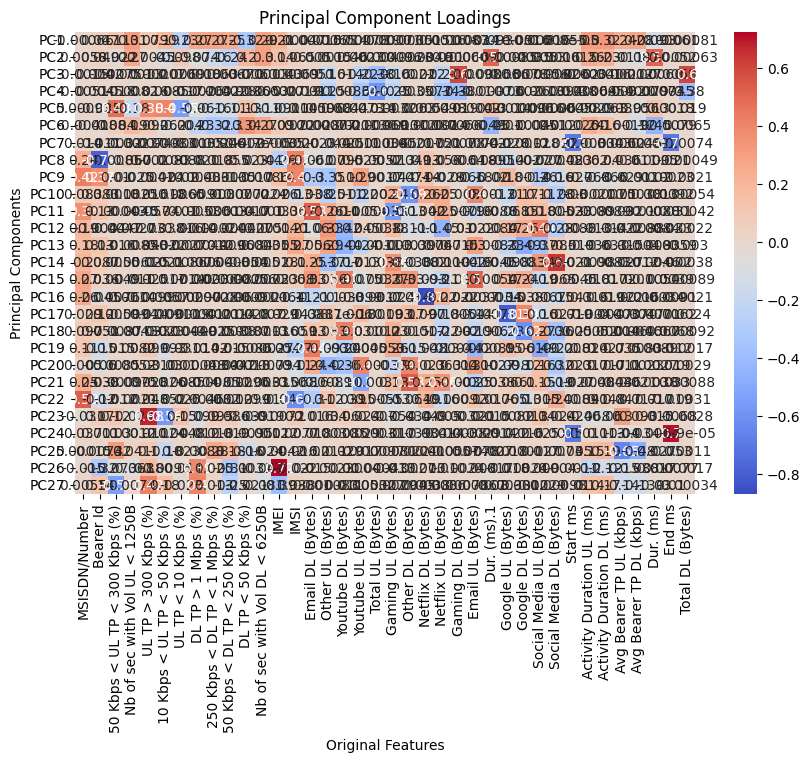

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(components, annot=True, cmap='coolwarm', xticklabels=feature_names, yticklabels=[f'PC{i+1}' for i in range(components.shape[0])])
plt.title('Principal Component Loadings')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.show()

This heat map shows the important numerical features. We have 27 principal components.
- Features with high loadings on the same component are likely correlated, and their values move together in that direction.
- Positive loading indicates positive correlation.
- Negative loading indicates negative correlation.


### Task-3.1
In the current dataset you’re expected to track the user’s engagement using the following engagement metrics: 
- sessions frequency 
- the duration of the session 
- the sessions total traffic (download and upload (bytes))


In [35]:
daf = df.copy()
daf['Total (Bytes)'] = daf['Total UL (Bytes)'] + daf['Total DL (Bytes)']

In [36]:
# Multiple aggregate on multiple columns
#function_def = {'Dur. (ms)': 'count', 'Total UL (Bytes)': 'sum', 'Total DL (Bytes)': 'sum'}
function_def = {'Dur. (ms)': ['count', 'sum'], 'Total (Bytes)': 'sum'}
agg_daf = daf.groupby(daf["MSISDN/Number"]).aggregate(function_def)
agg_daf.reset_index()

MSISDN/Number Dur. (ms)           Total (Bytes)
                         count       sum           sum
0       3.360100e+10         1  116720.0  8.786906e+08
1       3.360100e+10         1  181230.0  1.568596e+08
2       3.360100e+10         1  134969.0  5.959665e+08
3       3.360101e+10         1   49878.0  4.223207e+08
4       3.360101e+10         2   37104.0  1.457411e+09
...              ...       ...       ...           ...
106851  3.379000e+10         1    8810.0  7.146416e+08
106852  3.379000e+10         1  140988.0  4.803073e+08
106853  3.197021e+12         1  877385.0  2.321240e+08
106854  3.370000e+14         1  253030.0  5.962878e+08
106855  8.823971e+14         1  869844.0  1.391536e+08

[106856 rows x 4 columns]

In [37]:
agg_daf.columns

MultiIndex([(    'Dur. (ms)', 'count'),
            (    'Dur. (ms)',   'sum'),
            ('Total (Bytes)',   'sum')],
           )

In [75]:
top_10_frequency = pd.DataFrame(agg_daf[('Dur. (ms)', 'count')].sort_values(ascending=False)).reset_index()[:10]
top_10_duration = pd.DataFrame(agg_daf[('Dur. (ms)', 'sum')].sort_values(ascending=False)).reset_index()[:10]
top_10_data = pd.DataFrame(agg_daf[('Total (Bytes)', 'sum')].sort_values(ascending=False)).reset_index()[:10]

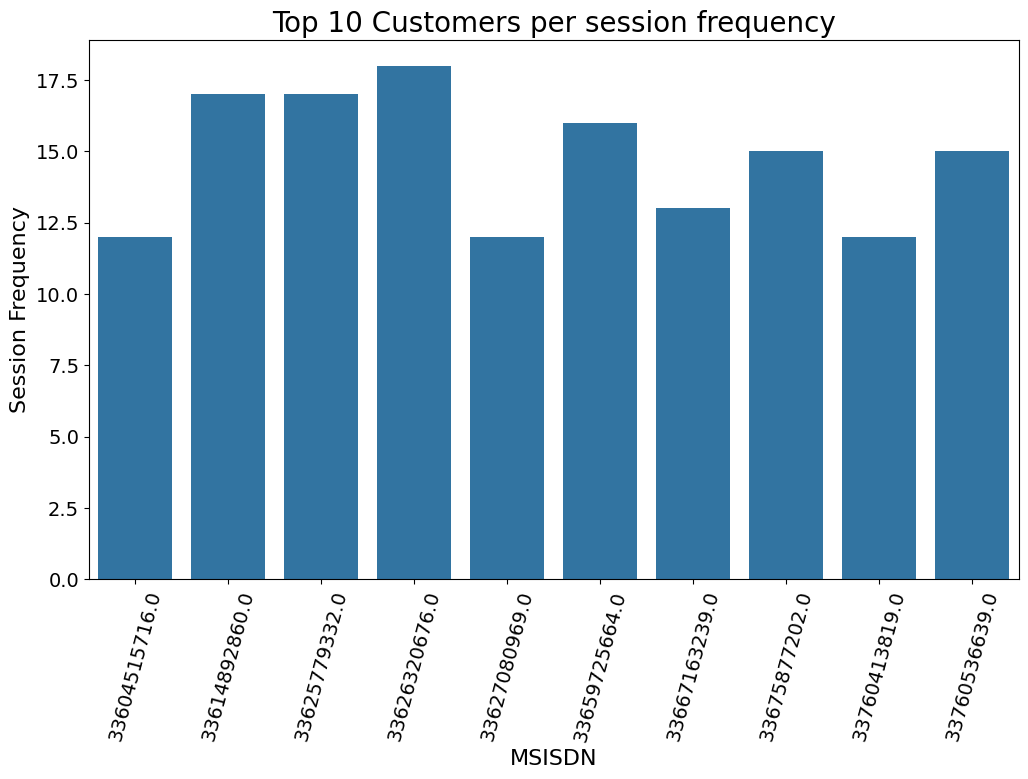

In [71]:
plot_bar(top_10_frequency, top_10_frequency["MSISDN/Number"], top_10_frequency[('Dur. (ms)', 'count')], 'Top 10 Customers per session frequency', "MSISDN", "Session Frequency")

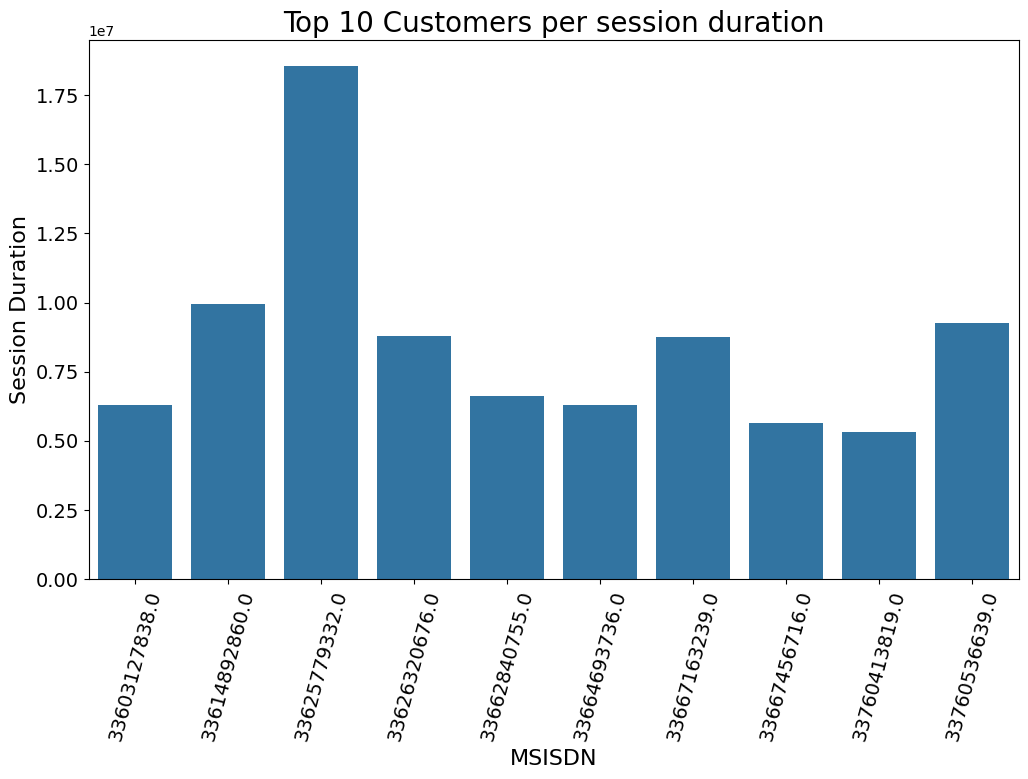

In [77]:
plot_bar(top_10_duration, top_10_duration["MSISDN/Number"], top_10_duration[('Dur. (ms)', 'sum')], 'Top 10 Customers per session duration', "MSISDN", "Session Duration")

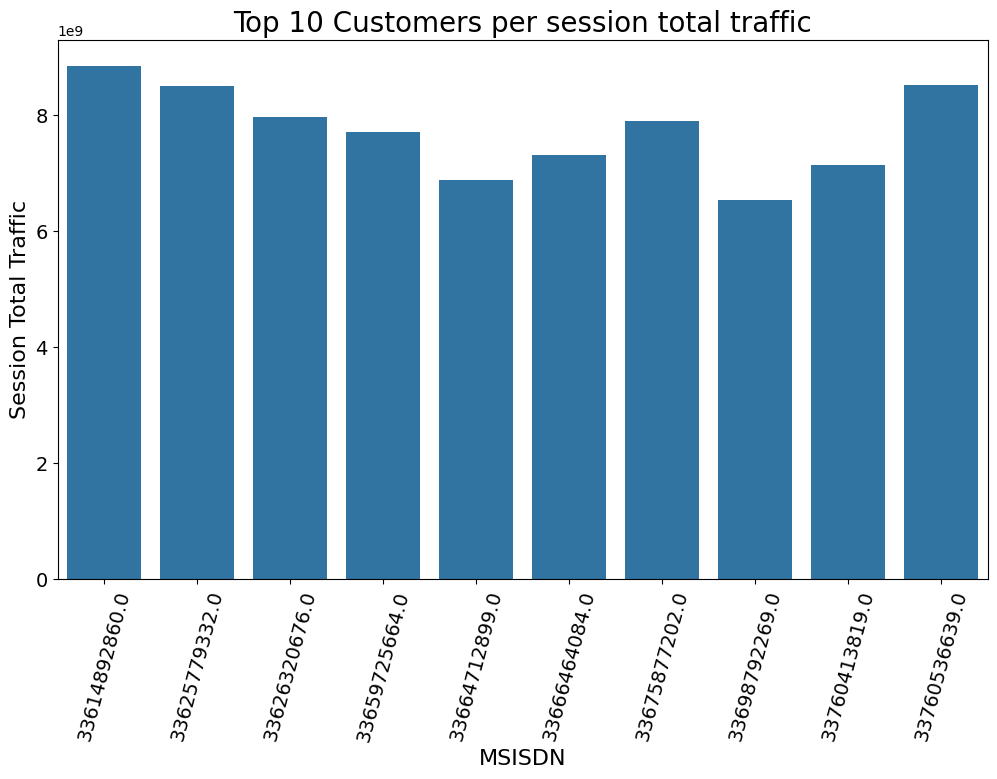

In [78]:
plot_bar(top_10_data, top_10_data["MSISDN/Number"], top_10_data[('Total (Bytes)', 'sum')], 'Top 10 Customers per session total traffic', "MSISDN", "Session Total Traffic")